#  <font color='brown'> **HEART DISEASE PREDICTION**

###  <font color='hotpink'> **Aim : To predict whether patient have heart diease or not using Machine Learning**

#### About the Dataset
The dataset consist of 14 variables and 303 observations.

###### Data Dictionary

1. age= age of patient in years
2. sex = gender of patient (1=male, 0=female)
3. cp = chest pain 

    >0: Typical angina: chest pain related decrease blood supply to the heart
    
    >1: Atypical angina: chest pain not related to heart
    
    >2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    >3: Asymptomatic: chest pain not showing signs of disease
    
4. trestbps = shows resting blood pressure of the patient(in mm Hg on admission to the hospital)
5. chol = shows the cholestrol of the patient
6. fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg = esting electrocardiographic results

    >0: Nothing to note
    
    >1: ST-T Wave abnormality
    
    >2: Possible or definite left ventricular hypertrophy
    
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment

    >0: Upsloping: better heart rate with excercise (uncommon)
    
    >1: Flatsloping: minimal change (typical healthy heart)
    
    >2: Downslopins: signs of unhealthy heart
    
12. ca = number of major vessels (0-3) colored by flouroscopy
13. thal = thalium test results

    >1,3: normal
    
    >6: fixed defect: used to be defect but ok now
    
    >7: reversable defect: no proper blood movement when excercising

14. target - whether patient have disease or not (1=yes, 0=no)


#### Importing Libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#### Loading the Dataset

In [4]:
#Loading the Dataset into dataframe named as "df"

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 1. Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Here we can see that there is no missing values which is really great for us.

In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0, 0.5, 'Count')

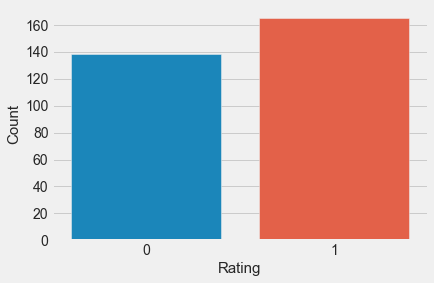

In [9]:
sns.countplot(x='target', data = df)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

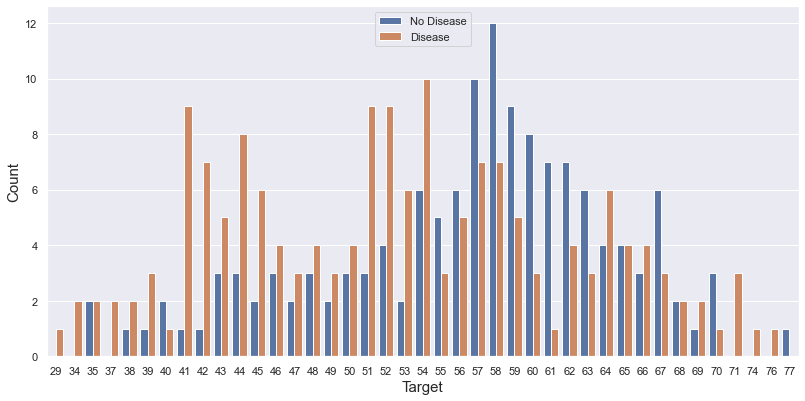

In [22]:
sns.countplot(x='age', hue='target',data=df)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(["No Disease", "Disease"])

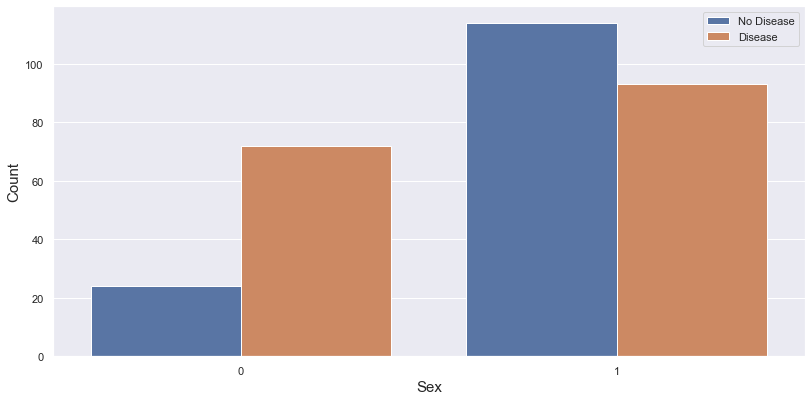

In [23]:
sns.countplot(x='sex', hue='target',data=df)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(["No Disease", "Disease"])

<Figure size 720x720 with 0 Axes>

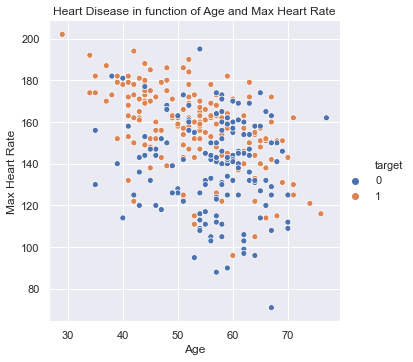

<Figure size 720x720 with 0 Axes>

In [34]:
sns.relplot(x="age", y="thalach", hue="target", data=df)

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.figure(figsize=(10, 10))

From the above correlation plot we can infer that our target varibale is strongly and positively correlated to variables like "cp" i.e. chest pain, and 'thalach' followed by 'slope' too. And on other hand, weakly correlated to variables like 'exang', 'oldpeak','thal' and many more.

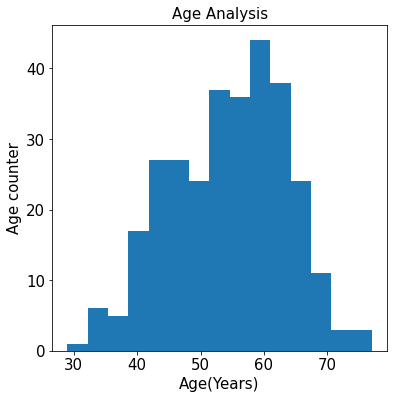

In [8]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(df["age"], bins = 15)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Age Analysis", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Age counter", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Age(Years)", fontsize = 15)

([<matplotlib.patches.Wedge at 0x28de0ee8d00>,
 [Text(-0.9228481310997082, -0.5986245291714798, '1'),
  Text(0.9228481871469777, 0.5986244427681993, '0')],
 [Text(-0.503371707872568, -0.32652247045717075, '68.3%'),
  Text(0.5033717384438059, 0.32652242332810866, '31.7%')])

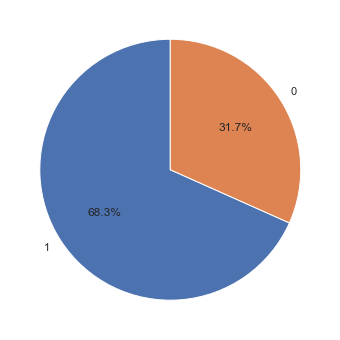

In [10]:
fig,axis = plt.subplots()
x = list(df['sex'].value_counts().index)
y = list(df['sex'].value_counts().values)
axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90)

([<matplotlib.patches.Wedge at 0x28de0f26be0>,
 [Text(-1.0892418930548835, -0.15346692938289383, '1'),
  Text(1.0892418786862677, 0.15346703136507955, '0')],
 [Text(-0.5941319416663, -0.08370923420885118, '54.5%'),
  Text(0.5941319338288732, 0.08370928983549793, '45.5%')])

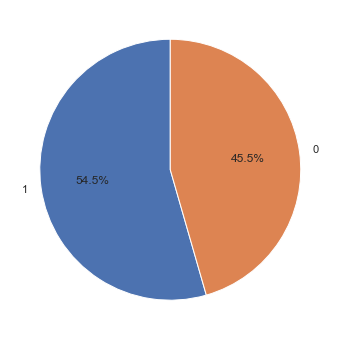

In [11]:
fig,axis = plt.subplots()
x = list(df['target'].value_counts().index)
y = list(df['target'].value_counts().values)
axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90)

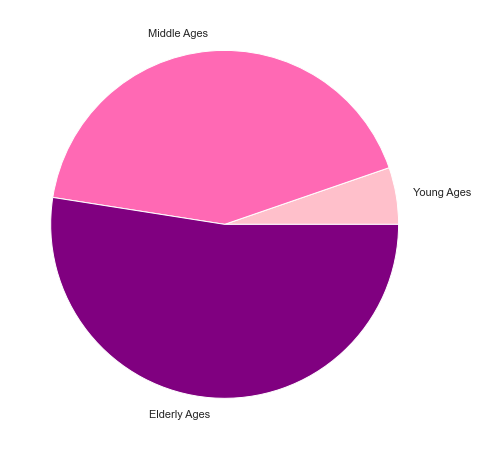

In [22]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]

colors = ['blue','green', 'black']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['Young Ages', 'Middle Ages', 'Elderly Ages'], colors = ['pink', 'hotpink', 'purple'])
plt.show()

#### 2. Correlation between the variables

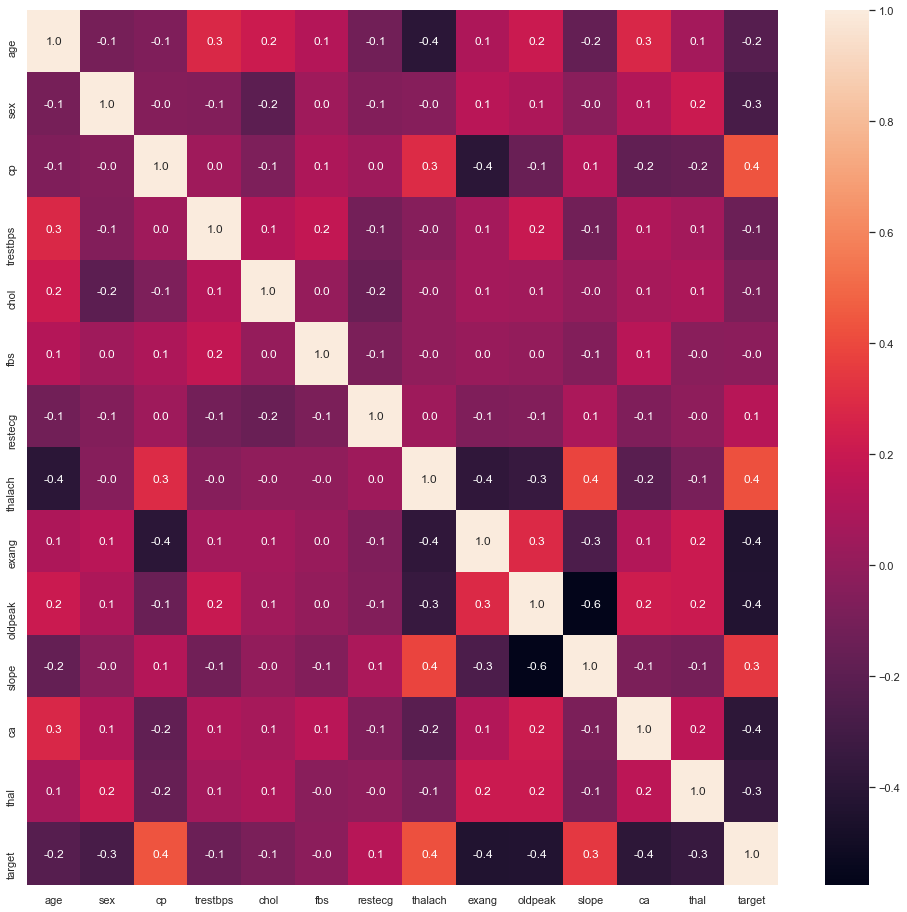

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

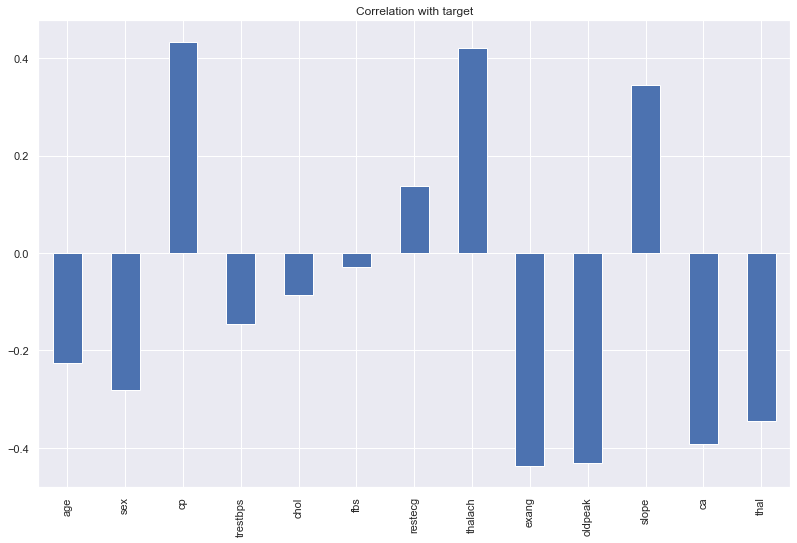

In [35]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

## MODEL BUILDING

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

x_data = df.drop(['target'],axis = 1)
y = df.target.values

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y, test_size = 0.3, random_state = 42)

In [65]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred_y_train = lr.predict(x_train)

In [66]:
print(classification_report(y_train, lr_pred_y_train ))
print(confusion_matrix(y_train, lr_pred_y_train ))

print('Test Accuracy {:.2f}%'.format(lr.score(x_train, y_train)*100))


              precision    recall  f1-score   support

           0       0.90      0.80      0.85        97
           1       0.85      0.92      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212

[[ 78  19]
 [  9 106]]
Test Accuracy 86.79%


In [67]:
lr_pred_y_test = lr.predict(x_test)
print(classification_report(y_test, lr_pred_y_test ))
print(confusion_matrix(y_test, lr_pred_y_test ))

print('Test Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[32  9]
 [ 8 42]]
Test Accuracy 81.32%


#### Decision Tree

In [58]:
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train)
dt_pred_y_train = dt.predict(x_train)

In [64]:
print(classification_report(y_train, dt_pred_y_train ))
print(confusion_matrix(y_train, dt_pred_y_train ))
print('Test Accuracy {:.2f}%'.format(dt.score(x_train, y_train)*100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

[[ 97   0]
 [  0 115]]
Test Accuracy 100.00%


In [63]:
dt_pred_y_test = dt.predict(x_test)
print(classification_report(y_test, dt_pred_y_test ))
print(confusion_matrix(y_test, dt_pred_y_test ))
print('Test Accuracy {:.2f}%'.format(dt.score(x_test, y_test)*100))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.81      0.68      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91

[[33  8]
 [16 34]]
Test Accuracy 73.63%


#### KNN Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

knn_pred_y_train = knn.predict(x_train)

In [70]:
print(classification_report(y_train, knn_pred_y_train ))
print(confusion_matrix(y_train, knn_pred_y_train ))
print('Test Accuracy {:.2f}%'.format(knn.score(x_train, y_train)*100))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.79      0.81      0.80       115

    accuracy                           0.78       212
   macro avg       0.78      0.78      0.78       212
weighted avg       0.78      0.78      0.78       212

[[72 25]
 [22 93]]
Test Accuracy 77.83%


In [71]:
knn_pred_y_test = knn.predict(x_test)
print(classification_report(y_test, knn_pred_y_test ))
print(confusion_matrix(y_test, knn_pred_y_test ))
print('Test Accuracy {:.2f}%'.format(knn.score(x_test, y_test)*100))


              precision    recall  f1-score   support

           0       0.58      0.61      0.60        41
           1       0.67      0.64      0.65        50

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.63      0.63      0.63        91

[[25 16]
 [18 32]]
Test Accuracy 62.64%


#### Support Vector

In [73]:
from sklearn.svm import SVC

svm = SVC(random_state= 1)
svm.fit(x_train, y_train)

svm_pred_y_train = svm.predict(x_train)

In [74]:
print(classification_report(y_train, svm_pred_y_train ))
print(confusion_matrix(y_train, svm_pred_y_train ))
print('Test Accuracy {:.2f}%'.format(svm.score(x_train, y_train)*100))


              precision    recall  f1-score   support

           0       0.73      0.41      0.53        97
           1       0.64      0.87      0.74       115

    accuracy                           0.66       212
   macro avg       0.68      0.64      0.63       212
weighted avg       0.68      0.66      0.64       212

[[ 40  57]
 [ 15 100]]
Test Accuracy 66.04%


In [75]:
svm_pred_y_test = svm.predict(x_test)
print(classification_report(y_test, svm_pred_y_test ))
print(confusion_matrix(y_test, svm_pred_y_test ))
print('Test Accuracy {:.2f}%'.format(svm.score(x_test, y_test)*100))


              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91

[[19 22]
 [ 5 45]]
Test Accuracy 70.33%


#### Random Forst

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)


rf_pred_y_train = rf.predict(x_train)

In [77]:
print(classification_report(y_train, rf_pred_y_train ))
print(confusion_matrix(y_train, rf_pred_y_train ))
print('Test Accuracy {:.2f}%'.format(rf.score(x_train, y_train)*100))

              precision    recall  f1-score   support

           0       0.73      0.41      0.53        97
           1       0.64      0.87      0.74       115

    accuracy                           0.66       212
   macro avg       0.68      0.64      0.63       212
weighted avg       0.68      0.66      0.64       212

[[ 40  57]
 [ 15 100]]
Test Accuracy 100.00%


In [79]:
rf_pred_y_test = rf.predict(x_test)
print(classification_report(y_test, rf_pred_y_test ))
print(confusion_matrix(y_test, rf_pred_y_test ))
print('Test Accuracy {:.2f}%'.format(rf.score(x_test, y_test)*100))

              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91

[[19 22]
 [ 5 45]]
Test Accuracy 80.22%
